Name : Bryce Kirby<br>
Class : DSC530<br>
Week 12: Term Project<br>
Assignment : Work on a term project that takes you through an exploratory data analysis project.**


In [1]:
import matplotlib.pyplot as plt        # plotting
import numpy as np                     # linear algebra
import os                              # accessing directory structure
import pandas as pd                    # data processing, CSV file I/O (e.g. pd.read_csv)
import thinkstats2
import thinkplot
import hypothesis
import statsmodels.formula.api as smf

In [2]:
def ReadMutualFund():
    # Read Mutual fund datatset
    df = pd.read_csv('C:/Users/super/OneDrive/Desktop/Data Science/DSC 530/Week 12/Mutual Funds.csv', parse_dates=[9])
    nRow, nCol = df.shape
    print(f'There are {nRow} rows and {nCol} columns, in Mutual Fund Dataset')
    
    return df

In [3]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['% Total Missing Values'] = 100 * mz_table['Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        print ("There are ", sum(mz_table['% Total Missing Values'] > 50), "columns having greater than 50% missing value.")
        print ("There are ", sum(mz_table['% Total Missing Values'] > 40), "columns having greater than 40% missing value.")
        print ("There are ", sum(mz_table['% Total Missing Values'] > 30), "columns having greater than 30% missing value.")
        print ("There are ", sum(mz_table['% Total Missing Values'] > 20), "columns having greater than 20% missing value.")
        print ("There are ", sum(mz_table['% Total Missing Values'] > 10), "columns having greater than 10% missing value.")

        return mz_table

In [4]:
def CleanDf(df):
    # Create new dataset with selected columns
    df_clean = df.filter(['fund_name', 'fund_extended_name', 'fund_family', 'net_assets', 
                    'ytd_return', 'fund_yield', 'morningstar_rating', 'inception_date', 
                    'investment', 'size', 'net_annual_expense_ratio_fund', 'price_earnings', 
                    'price_book', 'median_market_cap', 'morningstar_return_rating', 'fund_return_1month', 
                    'fund_return_3months', 'fund_return_1year', 'fund_return_3years', 
                    'fund_return_5years', 'fund_return_10years', 'fund_return_2018', 'portfolio_cash', 
                    'portfolio_stocks', 'portfolio_bonds', 'portfolio_others', 'portfolio_preferred', 
                    'portfolio_convertable', 'basic_materials', 'consumer_cyclical', 'financial_services', 
                    'real_estate', 'consumer_defensive', 'healthcare', 'utilities', 'communication_services', 
                    'energy', 'industrials', 'technology', 'morningstar_risk_rating', 'fund_alpha_3years', 
                    'fund_beta_3years', 'fund_r_squared_3years', 'fund_standard_deviation_3years', 
                    'fund_sharpe_ratio_3years', 'fund_treynor_ratio_3years'], axis=1)
    
    # Divide net assets columns by 1 Million for easier understanding.
    df_clean['net_assets'] = df_clean['net_assets']/1000000
    
    # Convert objects to numeric
    df_clean["median_market_cap"] = pd.to_numeric(df_clean.median_market_cap, errors='coerce')
    df_clean["price_earnings"] = pd.to_numeric(df_clean.price_earnings, errors='coerce')
    
    # Rename column
    df_clean.rename(columns={'size': 'f_size'}, inplace=True)
    
    return df_clean
    

In [5]:
def RemoveNull(df):
    df_non_null = df.dropna()
    nRow, nCol = df_non_null.shape
    print(f'There are {nRow} rows and {nCol} columns, after removing all rows with null values')
    
    return df_non_null

In [6]:
def sel_col(df):
    df_sel = df.filter(['fund_name', 'fund_extended_name', 'category', 'fund_family', 'investment', 'f_size', 
                        'net_assets', 'fund_yield', 'fund_return_2018', 'morningstar_rating', 'morningstar_return_rating', 
                        'morningstar_risk_rating', 'net_annual_expense_ratio_fund', 'median_market_cap', 'price_earnings', 
                        'price_book'], axis=1)
    
    return df_sel

In [7]:
def plot_hist(var):
    hist = thinkstats2.Hist(var)
    thinkplot.Hist(hist,align='left')
    
    return hist

In [8]:
def plot_compare_hist(var_l, var_p, width=0.45):
    loss_hist = thinkstats2.Hist(var_l, label='loss')
    profit_hist = thinkstats2.Hist(var_p, label='profit')

    thinkplot.PrePlot(2)
    thinkplot.Hist(loss_hist, align='right', width=width)
    thinkplot.Hist(profit_hist, align='left', width=width)

    return loss_hist, profit_hist

In [9]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [10]:
def Plot_10yr():
    profit_10 = MF_df.nlargest(10, ['fund_return_10years'])
    dfp = profit_10.filter(['fund_extended_name', 'fund_return_10years', 'fund_return_5years', 'fund_return_3years', 
                            'fund_return_1year'], axis=1)
    dfp.plot(x = 'fund_extended_name', kind='barh', figsize=(10, 8))
    plt.xlabel("% Return in a TimePeriod", labelpad=20)
    plt.ylabel("Name of the Fund", labelpad=20)
    plt.title("Top 10 Funds with highest Return in 10 years", y=1.02)
    
    return

In [11]:
MF_raw = ReadMutualFund() #Read Mutual Fund Dataset

There are 25308 rows and 125 columns, in Mutual Fund Dataset


C:\Users\f4puslg\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (20,22,23,119,121,123) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [12]:
df_null = missing_zero_values_table(MF_raw)   #Check dataset for missing values

Your selected dataframe has 125 columns and 25308 Rows.
There are 116 columns that have missing values.
There are  2 columns having greater than 50% missing value.
There are  6 columns having greater than 40% missing value.
There are  17 columns having greater than 30% missing value.
There are  20 columns having greater than 20% missing value.
There are  31 columns having greater than 10% missing value.


###### We have huge number of missing values in dataset. Lets first figureout important variables we are going to use for analysis and then we will repeat the above step.

### Important Variables
**fund_name** : short form of fund name<br>
**fund_extended_name** : long form of fund name<br>
**category** : Differentiating factor for mutual funds according to their investment objectives and principal investment features<br>
**fund_family** : A family of mutual funds is a group of funds that are marketed under one or more brand names, usually having the same distributor, and investment advisor<br>
**net_assets** : It represents the total of all dollars invested in all share classes of the fund. Do not confuse it with Net Asset Value(NAV, per share/unit price of the fund)<br>
**ytd_return** : profit generated since the start of the year.<br>
**fund_yield** : Yield is the income returned on an investment, such as the interest received from holding a security. The yield is usually expressed as an annual percentage rate based on the investment's cost, current market value, or face value<br>
**morningstar_rating** : The Morningstar Rating is a measure of a fund's risk-adjusted return, relative to similar funds. Funds are rated from 1 to 5 stars, with the best performers receiving 5 stars and the worst performers receiving a single star<br>
**inception_date** : The date on which the fund began its operations<br>
**investment** : Classification of funds based on both the size of the companies invested in and the growth prospects of the invested stocks. *Value Funds*, style of investing that looks for high-quality, low-growth companies that are out of favor with the market. *Growth Funds*, which look to companies that have had (and are expected to have) strong growth in earnings, sales, and cash flows. *Blend Funds*, which simply refers to companies that are neither value nor growth stocks and are classified as being somewhere in the middle.<br>
**size** : Size of fund. Large, Medium, Small<br>
**net_annual_expense_ratio_fund** : The expense ratio is the annual fee that all funds charge their shareholders<br>
**price_earnings** : PE stands for price-to-earnings ratio, and tells you whether a stock, a stock index, or a mutual find consisting of stocks is selling at a reasonable price<br>
**price_book** : Companies use the price-to-book ratio to compare a firm's market to book value by dividing the price per share by book value per share (BVPS). The price-to-book ratio compares a company's market value to its book value<br>
**median_market_cap** : The average market capitalization of a fund's equity portfolio gives you a measure of the size of the companies in which the fund invests<br>
**morningstar_return_rating** : The Morningstar return rating is a ranking given to publicly traded mutual funds and exchange-traded funds (ETFs) by the investment research firm Morningstar<br> 
**fund_return_1month** : profit generated in past 1 month<br>
**fund_return_3months** : profit generated in past 3 month<br>
**fund_return_1year** : profit generated in past 1 year<br>
**fund_return_3years** : profit generated in past 3 year<br>
**fund_return_5years** : profit generated in past 5 year<br>
**fund_return_10years** : profit generated in past 10 year<br>
**fund_return_2018** : profit generated in year 2018<br>
#### Portfolio Composition 
**portfolio_cash** : % of fund's portfolio composition % in cash<br>
**portfolio_stocks** : % of fund's portfolio composition % in stocks<br>
**portfolio_bonds** : % of fund's portfolio composition % in bonds<br>
**portfolio_others** : % of fund's portfolio composition % in others<br>
**portfolio_preferred** : % of fund's portfolio composition % in preferred<br>
**portfolio_convertable** : % of fund's portfolio composition % in convertable<br>
#### Portfolio Diversity
**basic_materials** : % exposure of mutual fund in basic material sector<br>
**consumer_cyclical** : % exposure of mutual fund in consumer cyclical sector<br>
**financial_services** : % exposure of mutual fund in financial services sector<br>
**real_estate** : % exposure of mutual fund in real estate sector<br>
**consumer_defensive** : % exposure of mutual fund in consumer defensive sector<br>
**healthcare** : % exposure of mutual fund in healthcare sector<br>
**utilities** : % exposure of mutual fund in utilities sector<br>
**communication_services** :% exposure of mutual fund in communication services sector<br>
**energy** : % exposure of mutual fund in energy sector<br>
**industrials** : % exposure of mutual fund in industrials sector<br>
**technology** : % exposure of mutual fund in technology sector<br>
#### Risk Assesment Variables
**morningstar_risk_rating** : The Morningstar risk rating is a ranking given to publicly traded mutual funds and exchange-traded funds (ETFs) by the investment research firm Morningstar<br>
**fund_alpha_3years** : Alpha is a measure of an investment's performance on a risk-adjusted basis. It takes the volatility (price risk) of a security or fund portfolio and compares its risk-adjusted performance to a benchmark index. For investors, the higher the alpha the better<br>
**fund_beta_3years** : Beta, also known as the beta coefficient, is a measure of the volatility, or systematic risk, of a security or a portfolio compared to the market as a whole<br>
**fund_r_squared_3years** : R-squared is a statistical measure that represents the percentage of a fund portfolio or a security's movements that can be explained by movements in a benchmark index<br>
**fund_standard_deviation_3years** : Standard deviation measures the dispersion of data from its mean. Basically, the more spread out the data, the greater the difference is from the norm<br>
**fund_sharpe_ratio_3years** : the Sharpe ratio measures risk-adjusted performance. The greater an investment's Sharpe ratio, the better its risk-adjusted performance<br>
**fund_treynor_ratio_3years** : The Treynor ratio, also known as the reward-to-volatility ratio, is a performance metric for determining how much excess return was generated for each unit of risk taken on by a portfolio.

In [13]:
#Create new dataframe with new columns

MF_C = CleanDf(MF_raw)   

In [14]:
missing_zero_values_table(MF_C)   #Check dataset for missing values

Your selected dataframe has 46 columns and 25308 Rows.
There are 40 columns that have missing values.
There are  1 columns having greater than 50% missing value.
There are  1 columns having greater than 40% missing value.
There are  1 columns having greater than 30% missing value.
There are  1 columns having greater than 20% missing value.
There are  1 columns having greater than 10% missing value.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,% Total Missing Values,Data Type
median_market_cap,6080,18661,73.7,24741,97.8,73.7,float64
fund_treynor_ratio_3years,1,1669,6.6,1670,6.6,6.6,object
fund_sharpe_ratio_3years,50,1669,6.6,1719,6.8,6.6,float64
fund_standard_deviation_3years,0,1669,6.6,1669,6.6,6.6,float64
fund_r_squared_3years,12,1669,6.6,1681,6.6,6.6,float64
fund_beta_3years,33,1669,6.6,1702,6.7,6.6,float64
fund_alpha_3years,52,1669,6.6,1721,6.8,6.6,float64
investment,0,1502,5.9,1502,5.9,5.9,object
f_size,0,1502,5.9,1502,5.9,5.9,object
fund_return_2018,18,954,3.8,972,3.8,3.8,float64


###### We can see all the columns have less than 10% missing values. I feel pretty safe to remove all the rows with NaN.

In [15]:
#Remove all rows with NaN(Null Values)

# MF_df = RemoveNull(MF_C)
MF_df = MF_C

## <font color=blue>Start of Assignment Tasks - 12.2 : Term Project</font>

# Questions
1.How year to date return is related to other factors and what are the import factors for good return?
2.Does expense ratio plays important role in Mutual Fund’s performance?
3.How the size of the fund affects its performance? How big is too big?
4.Which are all high performing funds of 2018?
5.What is the investment sector distribution of high performing funds?
6.How is the distribution of portfolio of high performing funds?
7.Is Morningstar_rating, MorningStar_return_rating and Morningstar_risk_rating worth considering for Mutual Fund investment?

1. **A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).**

Select specific columns into a new dataframe by calling function sel_col()

In [16]:
# Display head of dataframe
MF_df.head()

,fund_name,fund_extended_name,fund_family,net_assets,ytd_return,fund_yield,morningstar_rating,inception_date,investment,f_size,...,energy,industrials,technology,morningstar_risk_rating,fund_alpha_3years,fund_beta_3years,fund_r_squared_3years,fund_standard_deviation_3years,fund_sharpe_ratio_3years,fund_treynor_ratio_3years
0,AAAAX,DWS RREEF Real Assets Fund - Class A,DWS,530.28,12.79,1.43,3,2007-07-29,Blend,Large,...,17.03,9.24,1.08,3.0,-1.72,1.15,68.23,8.57,0.70,5.05
1,AAADX,Aberdeen Income Builder Fund Class A,Aberdeen,88.84,9.21,2.62,2,2011-12-29,Blend,Large,...,1.20,11.53,29.99,1.0,-0.44,0.76,90.39,8.58,1.01,11.55
2,AAAGX,Thrivent Large Cap Growth Fund Class A,Thrivent Funds,1080.00,16.00,0.00,3,1999-10-28,Growth,Large,...,0.78,7.08,35.30,3.0,0.58,1.11,80.41,13.36,1.05,12.65
3,AAAIX,American Century Strategic Allocation: Aggress...,American Century Investments,785.27,11.57,1.38,4,2000-07-31,Growth,Large,...,5.36,11.25,21.30,3.0,-1.25,1.40,96.05,8.76,0.92,5.77
4,AAANX,Horizon Active Asset Allocation Fund Investor ...,Horizon Investments,527.13,11.62,0.66,4,2012-01-30,Blend,Large,...,5.56,10.53,18.61,5.0,-3.54,1.76,91.37,11.31,0.72,4.5


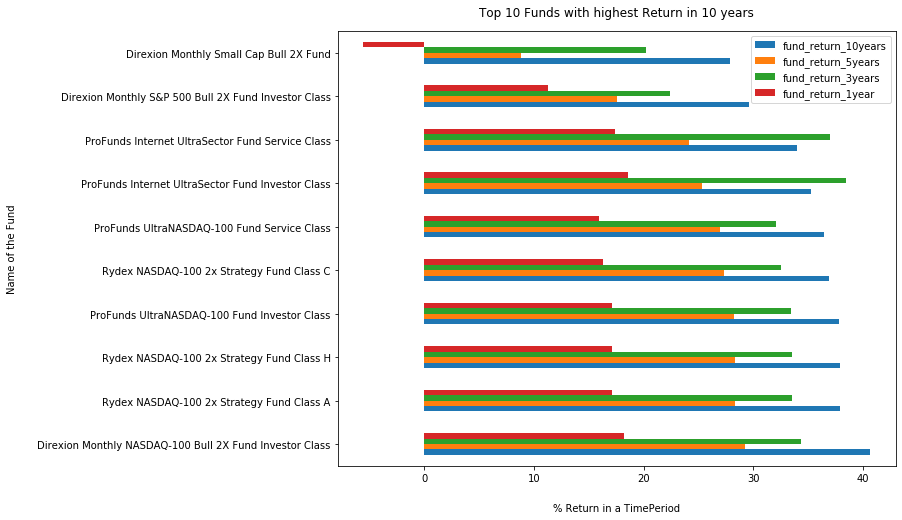

In [17]:
# Determine the top 10 funds gave highest return in 10 years and their corresponding 5yr, 3yr and 1yr returns.

Plot_10yr()

2. **Describe what the variables mean in the dataset (Chapter 1).**

In [18]:
# Calculate mean of all the variables in the dataframe.

# calculating mean of whole dataframe is taking long time. Please un-comment below code to run.

# MF_df.mean()

3. **Include a histogram of each of the variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).**

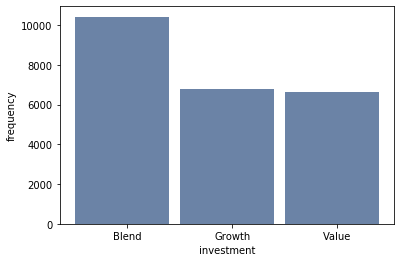

<Figure size 576x432 with 0 Axes>

In [19]:
# Plot histogram of investment
plot_hist(MF_df.investment)
thinkplot.Show(xlabel='investment', ylabel='frequency')

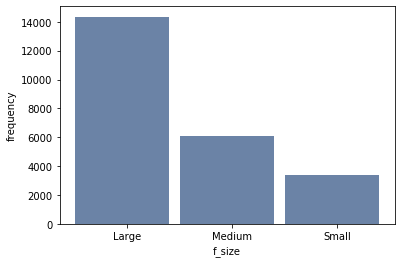

<Figure size 576x432 with 0 Axes>

In [20]:
# Plot histogram of f_size
plot_hist(MF_df.f_size)
thinkplot.Show(xlabel='f_size', ylabel='frequency')

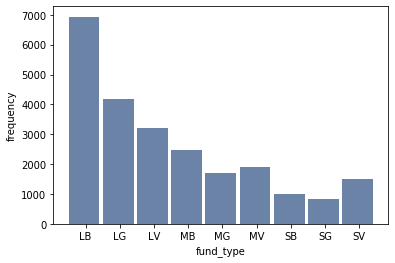

<Figure size 576x432 with 0 Axes>

In [21]:
# Plot histogram of fund_type

# Create fund_type by combining size and investment column
MF_df['fund_type'] = MF_df['f_size'].str.cat(MF_df['investment'],sep=" ")

# I was facing issue in accomodating text value display in x-axis and thinplot is not having rotation option. 
# Don't want to create new function using matplotlib. Solved this by changing the values.

MF_df['ftype'] = MF_df.fund_type.map({'Large Growth' : 'LG', 'Small Growth' : 'SG', 'Medium Growth' : 'MG', 
                              'Large Value' : 'LV', 'Medium Value' : 'MV', 'Small Value' : 'SV', 
                              'Large Blend' : 'LB', 'Medium Blend' : 'MB', 'Small Blend' : 'SB'})
plot_hist(MF_df.ftype)
thinkplot.Show(xlabel='fund_type', ylabel='frequency')

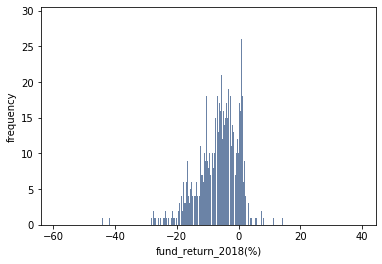

<Figure size 576x432 with 0 Axes>

In [22]:
# Plot histogram of fund_return_2018
hist = plot_hist(MF_df.fund_return_2018)
thinkplot.Show(xlabel='fund_return_2018(%)', ylabel='frequency')

In [23]:
# Looking into above histogram, it appears to have possibility of outliers.

# Check smallest 15 low values
hist.Smallest(15)

[(-59.1, 1),
 (-58.6, 1),
 (-48.0, 1),
 (-47.81, 1),
 (-47.73, 1),
 (-47.05, 1),
 (-46.51, 1),
 (-46.26, 1),
 (-46.13, 1),
 (-46.01, 1),
 (-45.81, 1),
 (-45.78, 1),
 (-45.73, 1),
 (-45.63, 1),
 (-45.57, 1)]

In [24]:
# Since, we have single attrition of each value we will examine detail records of funds having retun less than -20 in 2018
df = MF_df.loc[MF_df['fund_return_2018'] < -20]
df

,fund_name,fund_extended_name,fund_family,net_assets,ytd_return,fund_yield,morningstar_rating,inception_date,investment,f_size,...,technology,morningstar_risk_rating,fund_alpha_3years,fund_beta_3years,fund_r_squared_3years,fund_standard_deviation_3years,fund_sharpe_ratio_3years,fund_treynor_ratio_3years,fund_type,ftype
42,AAEMX,Alger Emerging Markets Fund Class A,Alger,28.45,10.38,1.91,2,2010-12-28,Growth,Large,...,20.76,3.0,-1.26,1.10,73.55,13.61,0.48,5.3,Large Growth,LG
89,AAWEX,Cavanal Hill World Energy Fund A,Cavanal Hill funds,37.03,12.91,1.30,4,2014-02-03,Blend,Large,...,2.15,1.0,-10.37,1.17,39.00,18.73,0.03,-0.98,Large Blend,LB
121,ABIAX,AB International Value Fund Class A,AllianceBernstein,185.43,8.69,0.23,1,2001-03-28,Value,Large,...,9.48,4.0,-6.24,1.07,86.16,12.14,0.11,0.54,Large Value,LV
122,ABIBX,AB International Value Fund Class B,AllianceBernstein,185.43,8.51,0.00,1,2001-03-28,Value,Large,...,9.48,4.0,-7.07,1.07,86.32,12.17,0.04,-0.22,Large Value,LV
123,ABICX,AB International Value Fund Class C,AllianceBernstein,185.43,8.54,0.00,1,2001-03-28,Value,Large,...,9.48,4.0,-7.02,1.07,86.16,12.21,0.05,-0.16,Large Value,LV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25274,WWWEX,Kinetics Global No Load Class,Kinetics,11.96,11.90,0.00,2,1999-12-30,Growth,Medium,...,12.12,4.0,7.43,0.64,16.89,16.51,0.72,17.67,Medium Growth,MG
25275,WWWFX,Kinetics Internet Fund No Load Class,Kinetics,115.88,13.57,0.00,2,1996-10-20,Growth,Large,...,25.46,5.0,2.86,0.65,15.38,17.82,0.60,14.85,Large Growth,LG
25290,YWBAX,Yorktown Mid-Cap Fund Class A,Yorktown Funds,18.88,12.47,0.00,0,2016-05-09,Value,Medium,...,12.70,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Medium Value,MV
25291,YWBIX,Yorktown Mid-Cap Fund Institutional Class,Yorktown Funds,18.88,12.53,0.18,0,2016-05-09,Value,Medium,...,12.70,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Medium Value,MV


**We have total 30 rows which had return less than -20%. By checking couple individual records in finance.yahoo.com, it seems these are legitimate values. These funds had very low negative return in 2018.**

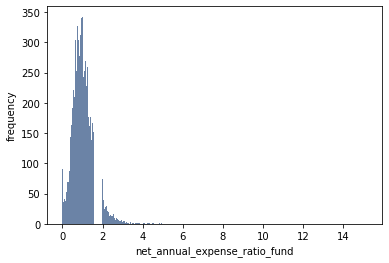

[(15.17, 1),
 (10.64, 1),
 (10.39, 1),
 (8.95, 1),
 (8.26, 1),
 (7.51, 1),
 (7.26, 1),
 (5.91, 1),
 (5.71, 1),
 (5.52, 1)]

<Figure size 576x432 with 0 Axes>

In [25]:
# Plot histogram of net_annual_expense_ratio_fund
hist = plot_hist(MF_df.net_annual_expense_ratio_fund)
thinkplot.Show(xlabel='net_annual_expense_ratio_fund', ylabel='frequency')
hist.Largest(10)

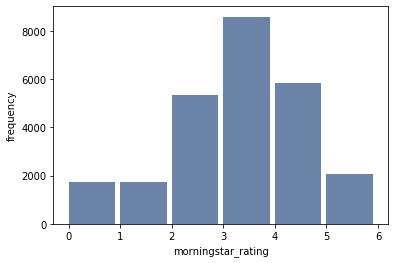

<Figure size 576x432 with 0 Axes>

In [26]:
# Plot histogram of morningstar_rating
hist = plot_hist(MF_df.morningstar_rating)
thinkplot.Show(xlabel='morningstar_rating', ylabel='frequency')

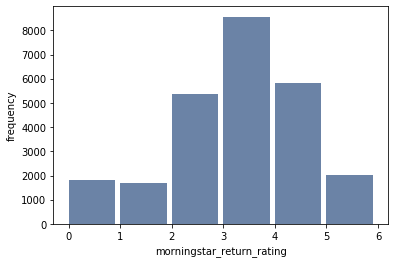

<Figure size 576x432 with 0 Axes>

In [27]:
# Plot histogram of morningstar_return_rating
hist = plot_hist(MF_df.morningstar_return_rating)
thinkplot.Show(xlabel='morningstar_return_rating', ylabel='frequency')

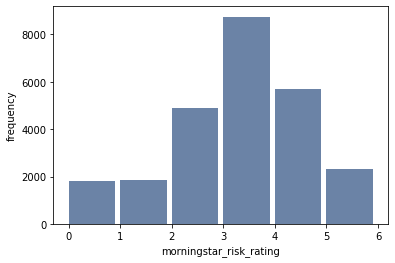

<Figure size 576x432 with 0 Axes>

In [28]:
# Plot histogram of morningstar_risk_rating
hist = plot_hist(MF_df.morningstar_risk_rating)
thinkplot.Show(xlabel='morningstar_risk_rating', ylabel='frequency')

4. **Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).**

We are going to calculate descriptive characterstics of funds in profit vs loss in 2018. 

In [29]:
# Select funds in profit and loss by using fund_return_2018
profit = MF_df[MF_df.fund_return_2018 > 0]
loss = MF_df[MF_df.fund_return_2018 < 0]

# Select funds in profit and loss by using fund_return_5years
profit5 = MF_df[MF_df.fund_return_5years > 0]
loss5 = MF_df[MF_df.fund_return_5years < 0]


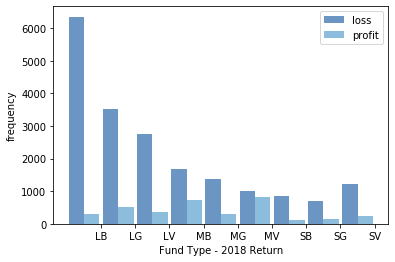

In [30]:
# 2018 Profit/Loss return compare of fund types
plot_compare_hist(loss.ftype, profit.ftype)    
thinkplot.Config(xlabel='Fund Type - 2018 Return', ylabel='frequency')

*From the above histogram of fund types for loss and profit funds, it is evident that Medium Value funds were most profitable and Large Blend were mostly in loss in 2018.*

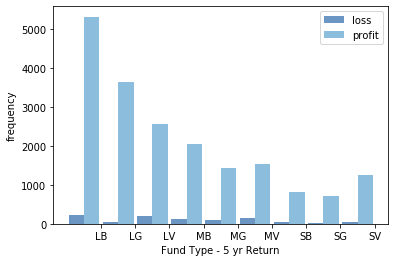

In [31]:
# 5 year Profit/Loss return compare of fund types 
plot_compare_hist(loss5.ftype, profit5.ftype)    
thinkplot.Config(xlabel='Fund Type - 5 yr Return', ylabel='frequency')

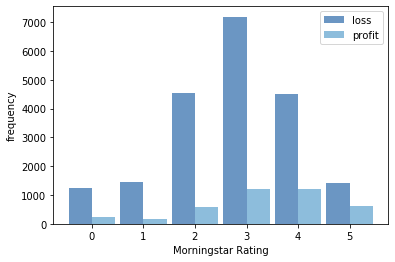

,loss,profit
count,20311.000000,4025.000000
mean,2.810841,3.196522
std,1.232205,1.326398
min,0.000000,0.000000
25%,2.000000,3.000000
50%,3.000000,3.000000
75%,4.000000,4.000000
max,5.000000,5.000000


<Figure size 576x432 with 0 Axes>

In [32]:
# 2018 Profit/Loss return compare of fund Morning Star Rating
plot_compare_hist(loss.morningstar_rating, profit.morningstar_rating)
thinkplot.Show(xlabel='Morningstar Rating', ylabel='frequency')

# Descriptive Characterstics
data = pd.DataFrame(data = {'loss' : loss.morningstar_rating, 'profit' : profit.morningstar_rating})
data.describe()

In year 2018 irrespective of Morning star rating, funds suffered loss for period of a year. 

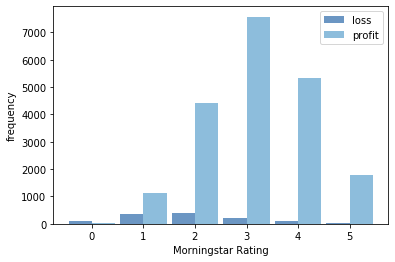

,loss,profit
count,1165.000000,20245.000000
mean,1.856652,3.103285
std,1.121127,1.029380
min,0.000000,0.000000
25%,1.000000,2.000000
50%,2.000000,3.000000
75%,3.000000,4.000000
max,5.000000,5.000000


<Figure size 576x432 with 0 Axes>

In [33]:
# 5 years Profit/Loss return compare of fund Morning Star Rating
plot_compare_hist(loss5.morningstar_rating, profit5.morningstar_rating)
thinkplot.Show(xlabel='Morningstar Rating', ylabel='frequency')

# Descriptive Characterstics
data = pd.DataFrame(data = {'loss' : loss5.morningstar_rating, 'profit' : profit5.morningstar_rating})
data.describe()

*If we are considering 5 year return all type of funds showed profit. Mean of morning star ratings of profitable funds was 3.10, whereas for funds in loss it was 1.85. It shows hight difference between morning star rating of profit and loss funds.*

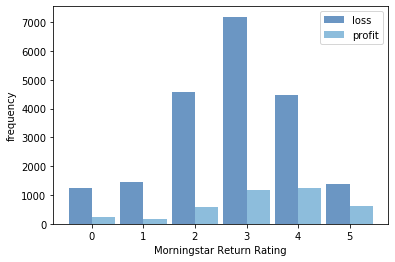

,loss,profit
count,20311.000000,4025.000000
mean,2.807592,3.187826
std,1.230021,1.323252
min,0.000000,0.000000
25%,2.000000,2.000000
50%,3.000000,3.000000
75%,4.000000,4.000000
max,5.000000,5.000000


<Figure size 576x432 with 0 Axes>

In [34]:
# histogram of morning star return ratings based on 2018 returns.
plot_compare_hist(loss.morningstar_return_rating, profit.morningstar_return_rating)
thinkplot.Show(xlabel='Morningstar Return Rating', ylabel='frequency')

data = pd.DataFrame(data = {'loss' : loss.morningstar_return_rating, 'profit' : profit.morningstar_return_rating})
data.describe()

*Higher the return rating, higher the profit.*

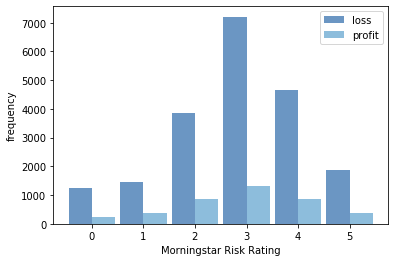

,loss,profit
count,20310.000000,4025.000000
mean,2.900098,2.809689
std,1.270386,1.301687
min,0.000000,0.000000
25%,2.000000,2.000000
50%,3.000000,3.000000
75%,4.000000,4.000000
max,5.000000,5.000000


<Figure size 576x432 with 0 Axes>

In [35]:

plot_compare_hist(loss.morningstar_risk_rating, profit.morningstar_risk_rating)
thinkplot.Show(xlabel='Morningstar Risk Rating', ylabel='frequency')

data = pd.DataFrame(data = {'loss' : loss.morningstar_risk_rating, 'profit' : profit.morningstar_risk_rating})
data.describe()

*Higher the risk rating, lower the profit.*

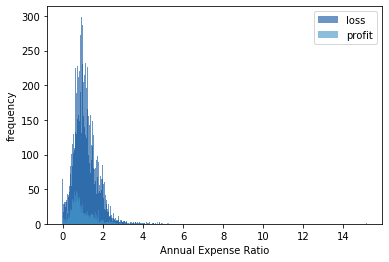

,loss,profit
count,20311.000000,4025.000000
mean,1.160167,0.911848
std,0.604684,0.576538
min,0.000000,0.000000
25%,0.770000,0.550000
50%,1.060000,0.760000
75%,1.480000,1.130000
max,15.170000,5.270000


<Figure size 576x432 with 0 Axes>

In [36]:
# net_annual_expense_ratio_fund

plot_compare_hist(loss.net_annual_expense_ratio_fund, profit.net_annual_expense_ratio_fund, width=0.02)
thinkplot.Show(xlabel='Annual Expense Ratio', ylabel='frequency')

data = pd.DataFrame(data = {'loss' : loss.net_annual_expense_ratio_fund, 'profit' : profit.net_annual_expense_ratio_fund})
data.describe()

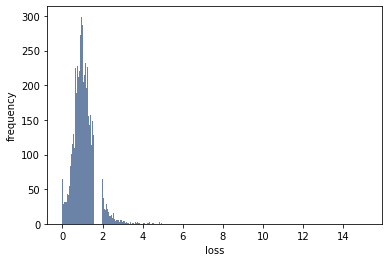

<Figure size 576x432 with 0 Axes>

In [37]:
loss_hist = plot_hist(loss.net_annual_expense_ratio_fund)
thinkplot.Show(xlabel='loss', ylabel='frequency')

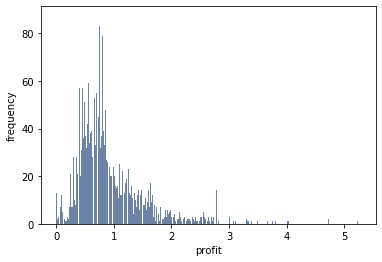

<Figure size 576x432 with 0 Axes>

In [38]:
profit_hist = plot_hist(profit.net_annual_expense_ratio_fund)
thinkplot.Show(xlabel='profit', ylabel='frequency')

*For the year of 2018, funds showed higher return whose expense ratio was lower. High performing funds had mean expense ratio lower than 1 and funds in loss had mean expense ratio greater than 1.*

5. **Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).**

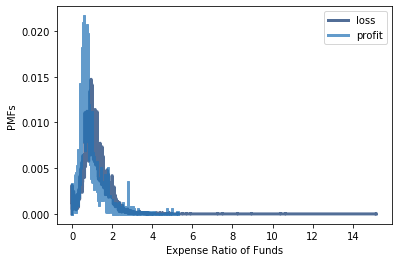

In [39]:
loss_pmf = thinkstats2.Pmf(loss.net_annual_expense_ratio_fund, label = 'loss')
profit_pmf = thinkstats2.Pmf(profit.net_annual_expense_ratio_fund, label = 'profit')

thinkplot.Pmfs([loss_pmf, profit_pmf])
thinkplot.Config(xlabel='Expense Ratio of Funds', ylabel='PMFs')

6. **Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).**

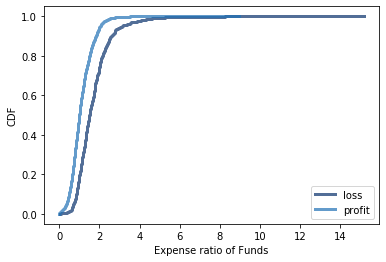

In [40]:
# Ploting CDF of expense ratio between profit/loss funds for 5years return
loss_cdf = thinkstats2.Cdf(loss5.net_annual_expense_ratio_fund, label = 'loss')
profit_cdf = thinkstats2.Cdf(profit5.net_annual_expense_ratio_fund, label = 'profit')
thinkplot.Cdfs([loss_cdf, profit_cdf])
thinkplot.Config(xlabel = 'Expense ratio of Funds', ylabel = 'CDF')

*CDF give more clearer difference of expense ratio between profit funds and loss funds. We can see expense ratio of profit funds are lower between 0 to 3.*

7. **Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).**

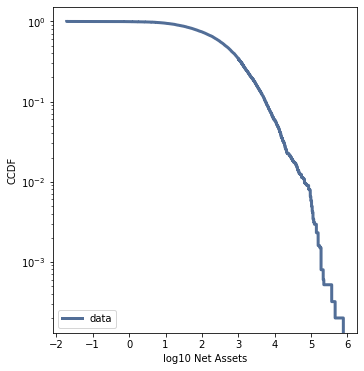

In [41]:
# Pareto Distribution on Net_Asset
log_net = np.log10(MF_df.net_assets)
cdf_net = thinkstats2.Cdf(MF_df.net_assets, label='data')
cdf_net_log = thinkstats2.Cdf(log_net, label='data')

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=550, alpha=1.1, low=0, high=1e7)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='0.8')
thinkplot.PrePlot(cols=2)
thinkplot.Cdf(cdf_net_log, complement=True) 
thinkplot.Config(xlabel='log10 Net Assets',
                 ylabel='CCDF',
                 yscale='log', loc='lower left')

*The above plot shows complementry CDF of fund's net assets, on a log-log scale*

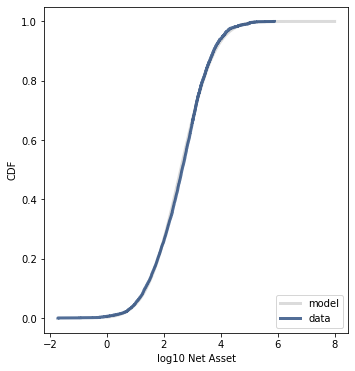

In [42]:
thinkplot.PrePlot(cols=2)

mu, sigma = log_net.mean(), log_net.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=8)
thinkplot.Plot(xs, ps, label='model', color='0.8')

thinkplot.Cdf(cdf_net_log) 
thinkplot.Config(xlabel='log10 Net Asset',
                 ylabel='CDF', loc='lower right')

*Here's a normal probability plot for the log-populations. The model fits the data well except in the right tail, where the bigger portfolios are bigger than expected.*

8. **Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).**

In [43]:
MF_df.corr(method='pearson')

,net_assets,ytd_return,fund_yield,morningstar_rating,net_annual_expense_ratio_fund,price_earnings,price_book,median_market_cap,morningstar_return_rating,fund_return_1month,...,communication_services,energy,industrials,technology,morningstar_risk_rating,fund_alpha_3years,fund_beta_3years,fund_r_squared_3years,fund_standard_deviation_3years,fund_sharpe_ratio_3years
net_assets,1.000000,0.029385,0.002532,0.112882,-0.112075,0.035308,0.027986,0.006942,0.099229,0.043556,...,0.014456,0.006853,0.004545,0.046307,-0.009651,0.054139,0.007315,0.072203,-0.009504,0.081294
ytd_return,0.029385,1.000000,-0.350612,0.113338,0.050336,0.641027,0.294757,0.233636,0.137020,0.121153,...,0.053044,0.056777,0.266553,0.591972,0.163155,-0.029889,0.411512,0.184152,0.687763,0.419620
fund_yield,0.002532,-0.350612,1.000000,0.073710,-0.209483,-0.380087,-0.205219,-0.006815,0.071601,0.099902,...,-0.001874,0.177090,-0.196834,-0.451205,-0.006876,0.238728,-0.167610,-0.268354,-0.427637,0.052908
morningstar_rating,0.112882,0.113338,0.073710,1.000000,-0.241497,0.082461,0.053851,0.047182,0.953689,0.123628,...,-0.016000,-0.003291,-0.003489,0.070074,0.418736,0.424826,0.056213,0.038424,-0.072694,0.450235
net_annual_expense_ratio_fund,-0.112075,0.050336,-0.209483,-0.241497,1.000000,0.125493,0.033978,0.111217,-0.229398,-0.071484,...,0.035470,0.068046,0.091500,0.070417,0.015080,-0.169155,-0.043028,-0.202571,0.235453,-0.193423
price_earnings,0.035308,0.641027,-0.380087,0.082461,0.125493,1.000000,0.355728,0.369612,0.080853,0.125991,...,0.134906,0.008714,0.252042,0.567100,0.047285,-0.031882,0.199699,0.124961,0.541943,0.319292
price_book,0.027986,0.294757,-0.205219,0.053851,0.033978,0.355728,1.000000,0.172872,0.054570,0.087664,...,0.039857,0.092307,0.126624,0.337793,0.021106,0.042731,0.103982,0.115355,0.215531,0.175692
median_market_cap,0.006942,0.233636,-0.006815,0.047182,0.111217,0.369612,0.172872,1.000000,0.046425,-0.223101,...,0.114863,0.632149,0.265738,0.248768,0.084966,0.106506,0.018792,-0.187794,0.244449,0.177919
morningstar_return_rating,0.099229,0.137020,0.071601,0.953689,-0.229398,0.080853,0.054570,0.046425,1.000000,0.116327,...,-0.018865,-0.003222,-0.008507,0.079518,0.501457,0.416530,0.081371,0.036103,-0.036395,0.441804
fund_return_1month,0.043556,0.121153,0.099902,0.123628,-0.071484,0.125991,0.087664,-0.223101,0.116327,1.000000,...,0.023215,0.041942,-0.179506,0.067591,-0.013918,0.331972,0.073377,0.109903,-0.168397,0.142467


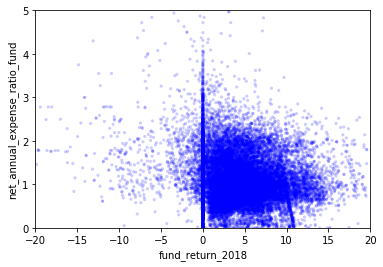

In [44]:
# plot Scatter Plot between 2018 fund returna and expense ratio

thinkplot.Scatter(MF_df.fund_return_5years, MF_df.net_annual_expense_ratio_fund, alpha=0.2, s=10)
thinkplot.Config(xlabel='fund_return_2018',
                 ylabel='net_annual_expense_ratio_fund',
                 axis=[ -20, 20, 0, 5],
                 legend=False)

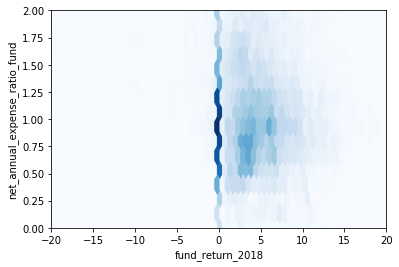

In [45]:
# An alternative to a scatter plot is something like a HexBin plot, which breaks the plane into bins, 
# counts the number of respondents in each bin, and colors each bin in proportion to its count.

thinkplot.HexBin(MF_df.fund_return_5years, MF_df.net_annual_expense_ratio_fund)
thinkplot.Config(xlabel='fund_return_2018',
                 ylabel='net_annual_expense_ratio_fund',
                 axis=[ -20, 20, 0, 2],
                 legend=False)

In [46]:
# Calculate Covariance
MF_df1 = RemoveNull(MF_df)
np.cov(MF_df1.fund_return_2018, MF_df1.net_annual_expense_ratio_fund)

There are 4908 rows and 48 columns, after removing all rows with null values


array([[15.22076719, -0.63266199],
       [-0.63266199,  0.24768421]])

*Covariance between expense ratio and fund return in 2018 is -0.63*

In [47]:
# Calculate pearson correlation

np.corrcoef(MF_df1.fund_return_2018, MF_df1.net_annual_expense_ratio_fund)

array([[ 1.        , -0.32583993],
       [-0.32583993,  1.        ]])

*Pearson correlation between expense ratio and fund return in 2018 is -0.33*

*From above analysis it iclear that there is non-linear relationship between expense ratio and fund return in 2018.*<br>
*Hence, we will calculate Spearman's rank correlation*

In [48]:
# Calculate Spearman's correlation

# Calculate rank of each variable

MF_df1['fund_return_2018_r'] = MF_df1.fund_return_2018.rank()
MF_df1['net_annual_expense_ratio_fund_r'] = MF_df1.net_annual_expense_ratio_fund.rank()

C:\Users\f4puslg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\f4puslg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
np.corrcoef(MF_df1.fund_return_2018_r, MF_df1.net_annual_expense_ratio_fund_r)

array([[ 1.        , -0.42571489],
       [-0.42571489,  1.        ]])

9. **Conduct a test on your hypothesis using one of the methods covered in Chapter 9.**

In [50]:
# Testing the difference in mean between profic and loss funds by morning star rating

data = loss.morningstar_rating, profit.morningstar_rating
ht = hypothesis.DiffMeansPermute(data) # difference in means by permutation
p1 = ht.PValue(iters=10000)                       # Get the p-value
p1

0.0

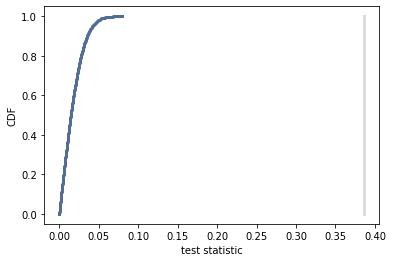

<Figure size 576x432 with 0 Axes>

In [51]:

ht.PlotCdf()
thinkplot.Show(xlabel='test statistic',
               ylabel='CDF')

*plot of the distribution of the test statistic and a gray line indicating the observed effect size*

*We run the same analysis with morningstar_rating, the computed p-value is 0; after 1000 attempts, the simulation never yields an effect as big as the observed difference, 0.39. So we would report p < 0.001, and conclude that the difference in morningstar_rating is statistically significant.*

10. **or this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).**

In [52]:
# Here we choose fund_return_10years as dependent and morningstar_rating, net_assets 
# and net_annual_expense_ratio_fund as explanatory variable.

formula = 'fund_return_10years ~ morningstar_rating + net_assets + price_earnings'
model = smf.ols(formula, data=MF_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     fund_return_10years   R-squared:                       0.220
Model:                             OLS   Adj. R-squared:                  0.220
Method:                  Least Squares   F-statistic:                     2357.
Date:                 Sat, 29 Feb 2020   Prob (F-statistic):               0.00
Time:                         16:00:30   Log-Likelihood:                -79559.
No. Observations:                25073   AIC:                         1.591e+05
Df Residuals:                    25069   BIC:                         1.592e+05
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.4120      0.099     -4.152      0.000      -0.607      -0.218
morningstar_rating     1.3287      0.029     46.038      0.000       1.272       1.385
net_assets          2.807e-05   2.02e-06     13.908      0.000    2.41e-05     3.2e-05
price_earnings         0.2584      0.004     63.176      0.000       0.250       0.266
==============================================================================
Omnibus:                     1846.441   Durbin-Watson:                   1.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3644.826
Skew:                          -0.512   Prob(JB):                         0.00
Kurtosis:                       4.562   Cond. No.                     5.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
# Perform Prediction

columns = ['morningstar_rating', 'net_assets', 'price_earnings']
new = pd.DataFrame([[4, 200, 17.0]], columns=columns)
model.predict(new)

0    9.30082
dtype: float64

**As per our model there will be 9.3% 10year return on a 200 million dollar fund, whose morning star rating is 4 and price to rearnings ratio is 17.0**